## <font color = 'purple'>Notebook 11: Valence Aware Dictionary and sEntiment Reasoner (VADER)</font>

<font color = 'purple'>VADER is a sentiment analysis tool specifically designed to analyse the sentiment of text data, particularly in social media. It uses a combination of pre-built lexicon of sentiment-related words and rules to assign a sentiment score, effectively capturing both polarity (positive or negative) and intensity.</font>

In [31]:
from google.colab import files
uploaded = files.upload()

Saving main_dataset.xlsx to main_dataset (1).xlsx


In [32]:
# Libraries for data processing
import numpy as np
import pandas as pd

# Libraries for text processing and NLP
import nltk
from textblob import TextBlob

# Gensim library for topic modelling and text vectorisation
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess

# Libraries for data visualisation
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import matplotlib.pyplot as plt

# Miscellaneous imports
import re
import warnings
warnings.filterwarnings("ignore")

In [33]:
df = pd.read_excel('main_dataset.xlsx')

print("Shape of the dataset:", df.shape)
print("Columns in the dataset:", df.columns)

df.head()

Shape of the dataset: (44855, 4)
Columns in the dataset: Index(['date', 'review', 'rating', 'userName'], dtype='object')


date                                             review  \
0 2021-05-06 05:15:00.000  This feature has been one of the most annoying...   
1 2024-02-01 09:06:59.904  The privacy on WhatsApp is incredible, I know ...   
2 2023-08-14 05:42:00.000  Hi WhatsApp,\nThis app is really great, I use ...   
3 2024-08-04 15:53:00.384  If there was ever an equivalent of social serv...   
4 2024-05-26 01:12:59.616  Im on holiday and reliant on whatsapp to commu...   

   rating           userName  
0       5     Keanu De Sousa  
1       4  The great idea!!!  
2       4  Pokey Ball ‚öæÔ∏è  
3       1           Zenicero  
4       1    JohnDoe63737286

In [34]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if you haven't already
nltk.download('stopwords')

# Set of stopwords in English
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if pd.isna(text) or not isinstance(text, str):
        return ""

    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Split text into words and remove stopwords
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]

    # Join the filtered words back into a single string
    cleaned_text = ' '.join(filtered_words)

    return cleaned_text

# Apply the updated preprocess_text function to your dataset
df['content_cleaned'] = df['review'].apply(preprocess_text)

# Display the first few rows of the cleaned content
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


date                                             review  \
0 2021-05-06 05:15:00.000  This feature has been one of the most annoying...   
1 2024-02-01 09:06:59.904  The privacy on WhatsApp is incredible, I know ...   
2 2023-08-14 05:42:00.000  Hi WhatsApp,\nThis app is really great, I use ...   
3 2024-08-04 15:53:00.384  If there was ever an equivalent of social serv...   
4 2024-05-26 01:12:59.616  Im on holiday and reliant on whatsapp to commu...   

   rating           userName  \
0       5     Keanu De Sousa   
1       4  The great idea!!!   
2       4  Pokey Ball ‚öæÔ∏è   
3       1           Zenicero   
4       1    JohnDoe63737286   

                                     content_cleaned  
0  feature one annoying aspects whatsapp everytim...  
1  privacy whatsapp incredible know probably donä...  
2  hi whatsapp app really great use everyday exac...  
3  ever equivalent social services took words awa...  
4  im holiday reliant whatsapp communicate agents...

In [35]:
df.isnull()
total_null_values = df.isnull().sum().sum()
print("Total null values in the DataFrame: ", total_null_values)
df.fillna('', inplace = True)
df['date'] = pd.to_datetime(df['date'], dayfirst = True)
df = df[['content_cleaned', 'review', 'rating', 'date']]
df.head()

Total null values in the DataFrame:  12


content_cleaned  \
0  feature one annoying aspects whatsapp everytim...   
1  privacy whatsapp incredible know probably donä...   
2  hi whatsapp app really great use everyday exac...   
3  ever equivalent social services took words awa...   
4  im holiday reliant whatsapp communicate agents...   

                                              review  rating  \
0  This feature has been one of the most annoying...       5   
1  The privacy on WhatsApp is incredible, I know ...       4   
2  Hi WhatsApp,\nThis app is really great, I use ...       4   
3  If there was ever an equivalent of social serv...       1   
4  Im on holiday and reliant on whatsapp to commu...       1   

                     date  
0 2021-05-06 05:15:00.000  
1 2024-02-01 09:06:59.904  
2 2023-08-14 05:42:00.000  
3 2024-08-04 15:53:00.384  
4 2024-05-26 01:12:59.616

In [36]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['content_cleaned'].apply(get_sentiment)
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0.1 else
                                             ('negative' if x <- 0.1 else 'neutral'))

In [37]:
df[['content_cleaned', 'rating', 'sentiment_label']]

content_cleaned  rating  \
0      feature one annoying aspects whatsapp everytim...       5   
1      privacy whatsapp incredible know probably donä...       4   
2      hi whatsapp app really great use everyday exac...       4   
3      ever equivalent social services took words awa...       1   
4      im holiday reliant whatsapp communicate agents...       1   
...                                                  ...     ...   
44850                                free delivery prime       5   
44851          would expectamazon trying get hand pocket       3   
44852  registry system mess sorting price low high wa...       2   
44853  clothes furniture options kinda meh overall de...       3   
44854  im mad cant use tablet anymore update im still...       1   

      sentiment_label  
0            negative  
1            positive  
2            positive  
3            positive  
4            negative  
...               ...  
44850        positive  
44851         neutral  
44852         neutral  
44853         neutral  
44854        negative  

[44855 rows x 3 columns]

In [38]:
# First, install the VADER sentiment analyser
nltk.download('vader_lexicon')

# Import VADER sentiment analyser
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Instantiate the VADER sentiment analyzer
vader = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [39]:
# Function to get the VADER sentiment scores
def get_vader_sentiment(text):
    if not text or text == '':
        return {'compound': 0.0, 'neg': 0.0, 'neu': 0.0, 'pos': 0.0}

    # Analyze the sentiment of the text
    sentiment_scores = vader.polarity_scores(text)

    return sentiment_scores

In [40]:
# Apply VADER sentiment analysis to the cleaned content
df['vader_sentiment'] = df['content_cleaned'].apply(get_vader_sentiment)

# Extract the compound score from the sentiment analysis results
df['vader_compound'] = df['vader_sentiment'].apply(lambda x: x['compound'])

In [41]:
# Label the sentiment based on the compound score (thresholds are customisable)
df['vader_sentiment_label'] = df['vader_compound'].apply(lambda x: 'positive' if x > 0.1 else
                                                         ('negative' if x < -0.1 else 'neutral'))

In [42]:
# Display the relevant columns, including VADER sentiment analysis
df[['content_cleaned', 'rating', 'vader_sentiment_label', 'vader_compound']].head()

content_cleaned  rating  \
0  feature one annoying aspects whatsapp everytim...       5   
1  privacy whatsapp incredible know probably donä...       4   
2  hi whatsapp app really great use everyday exac...       4   
3  ever equivalent social services took words awa...       1   
4  im holiday reliant whatsapp communicate agents...       1   

  vader_sentiment_label  vader_compound  
0              negative         -0.4019  
1              positive          0.1779  
2              positive          0.9164  
3              negative         -0.1280  
4              positive          0.4404

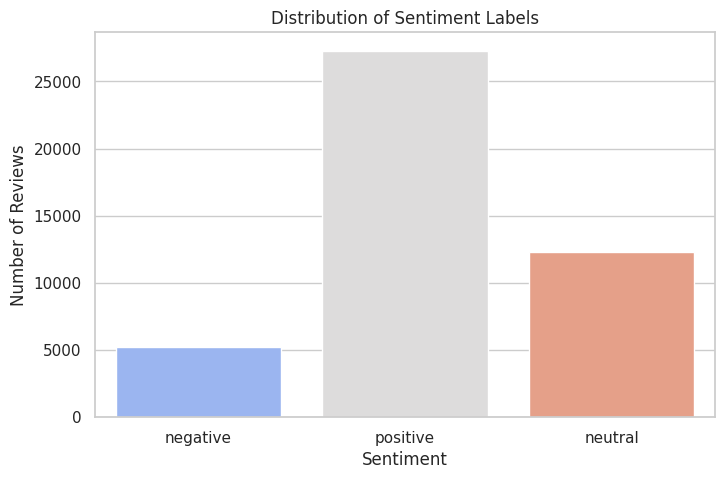

In [43]:
# Import libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid")

# Plot the distribution of sentiment labels
plt.figure(figsize = (8, 5))
sns.countplot(x = 'vader_sentiment_label', data = df, palette = 'coolwarm')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

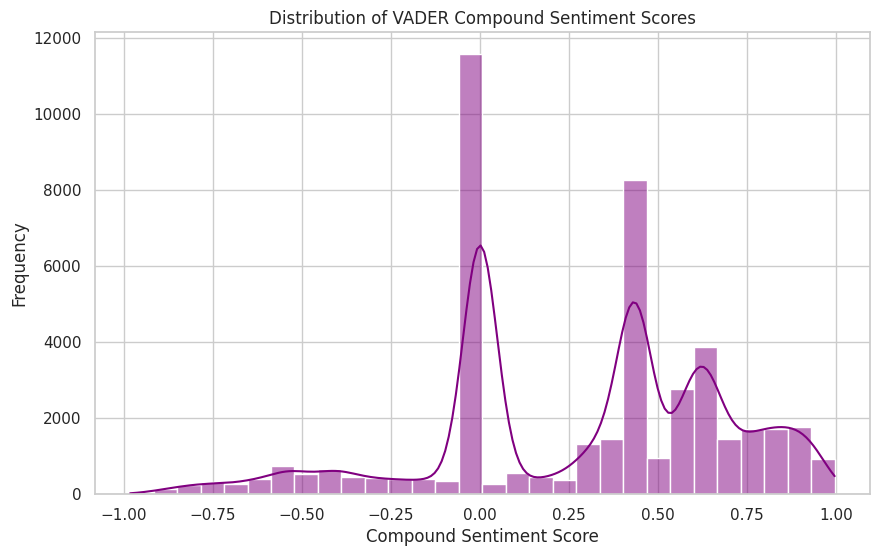

In [44]:
# Plot the distribution of the compound sentiment scores
plt.figure(figsize=(10,6))
sns.histplot(df['vader_compound'], bins = 30, kde = True, color = 'purple')
plt.title('Distribution of VADER Compound Sentiment Scores')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.show()

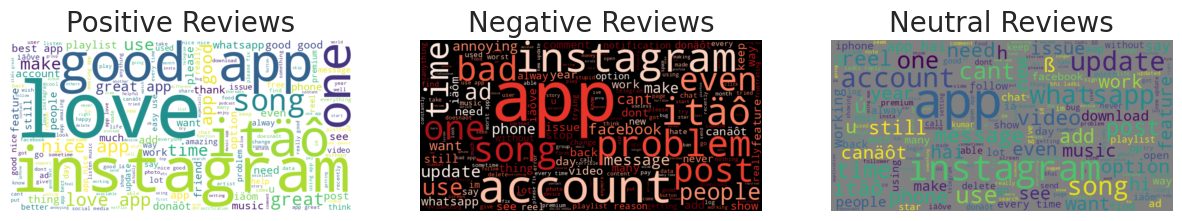

In [45]:
from wordcloud import WordCloud

# Create a word cloud for positive reviews
positive_reviews = ' '.join(df[df['vader_sentiment_label'] == 'positive']['content_cleaned'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# Create a word cloud for negative reviews
negative_reviews = ' '.join(df[df['vader_sentiment_label'] == 'negative']['content_cleaned'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_reviews)

# Create a word cloud for neutral reviews
neutral_reviews = ' '.join(df[df['vader_sentiment_label'] == 'neutral']['content_cleaned'])
wordcloud_neutral = WordCloud(width=800, height=400, background_color='gray').generate(neutral_reviews)

# Plot the word clouds
plt.figure(figsize=(15, 10))

# Positive
plt.subplot(1, 3, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Reviews', size=20)
plt.axis('off')

# Negative
plt.subplot(1, 3, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Reviews', size=20)
plt.axis('off')

# Neutral
plt.subplot(1, 3, 3)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Neutral Reviews', size=20)
plt.axis('off')

plt.show()

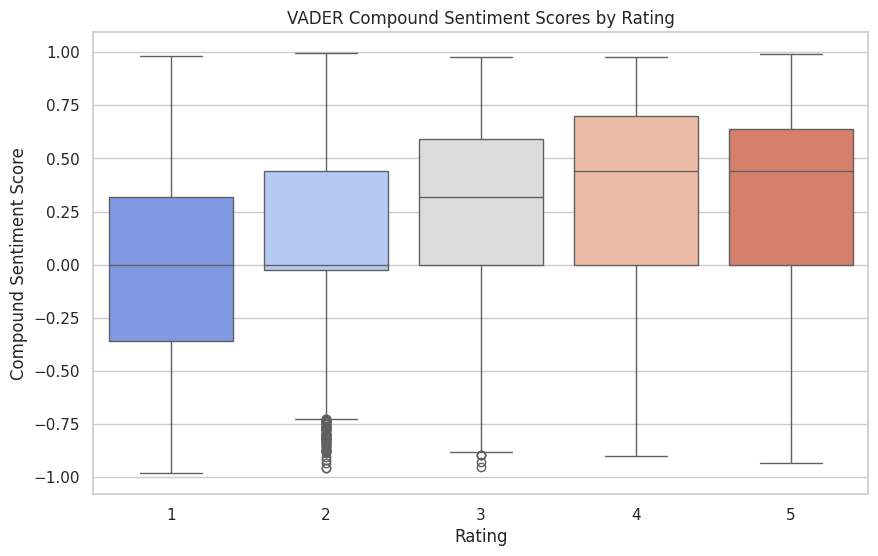

In [46]:
# Box plot of compound sentiment scores by rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='vader_compound', data=df, palette='coolwarm')
plt.title('VADER Compound Sentiment Scores by Rating')
plt.xlabel('Rating')
plt.ylabel('Compound Sentiment Score')
plt.show()

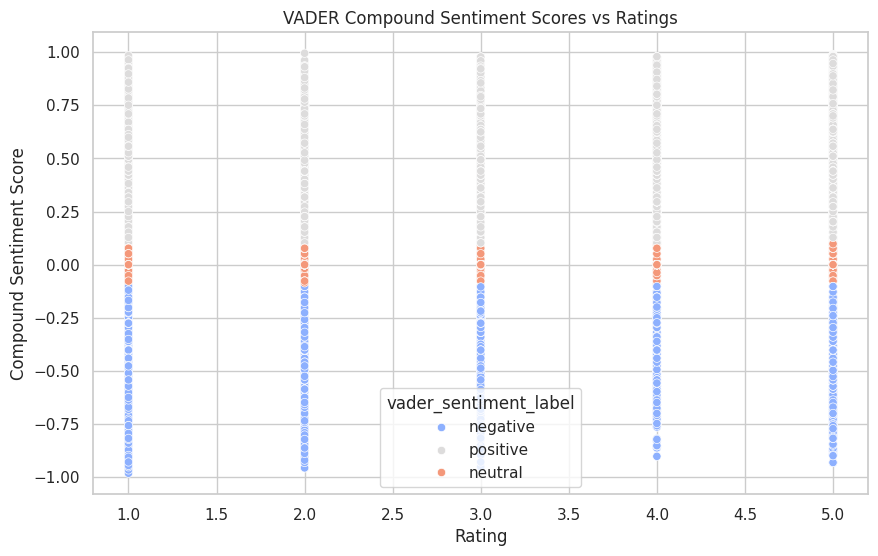

In [47]:
# Scatter plot of sentiment scores vs. ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='vader_compound', data=df, hue='vader_sentiment_label', palette='coolwarm')
plt.title('VADER Compound Sentiment Scores vs Ratings')
plt.xlabel('Rating')
plt.ylabel('Compound Sentiment Score')
plt.show()

In [48]:
df['date'] = pd.to_datetime(df['date'])  # Ensure date is in datetime format
sentiment_over_time = df.groupby(df['date'].dt.date).agg({'vader_compound': 'mean'}).reset_index()
sentiment_over_time.columns = ['date', 'average_sentiment']

In [49]:
sentiment_by_rating = df.groupby('rating').agg({'vader_compound': 'mean', 'vader_sentiment_label': pd.Series.mode}).reset_index()
sentiment_by_rating.columns = ['rating', 'average_sentiment', 'most_common_sentiment']

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
X = vectorizer.fit_transform(df['content_cleaned'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df['vader_sentiment_label'] = df['vader_sentiment_label']


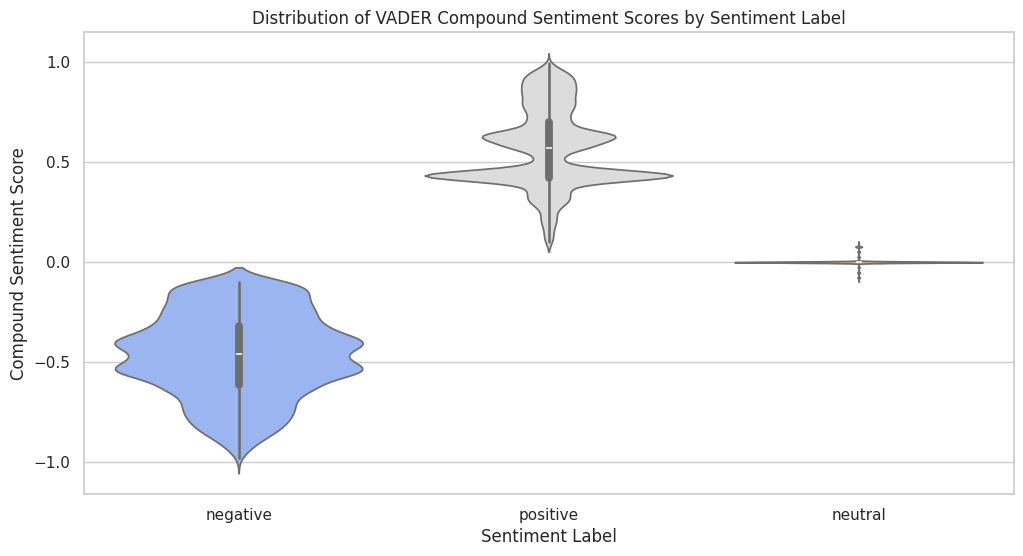

In [51]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='vader_sentiment_label', y='vader_compound', data=df, palette='coolwarm')
plt.title('Distribution of VADER Compound Sentiment Scores by Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Compound Sentiment Score')
plt.show()

Accuracy: 0.80
Precision: 0.82
Recall: 0.80
F1-score: 0.80

Classification Report:
              precision    recall  f1-score   support

    negative       0.48      0.68      0.56      3722
     neutral       0.88      0.64      0.74     16805
    positive       0.83      0.93      0.88     24328

    accuracy                           0.80     44855
   macro avg       0.73      0.75      0.73     44855
weighted avg       0.82      0.80      0.80     44855



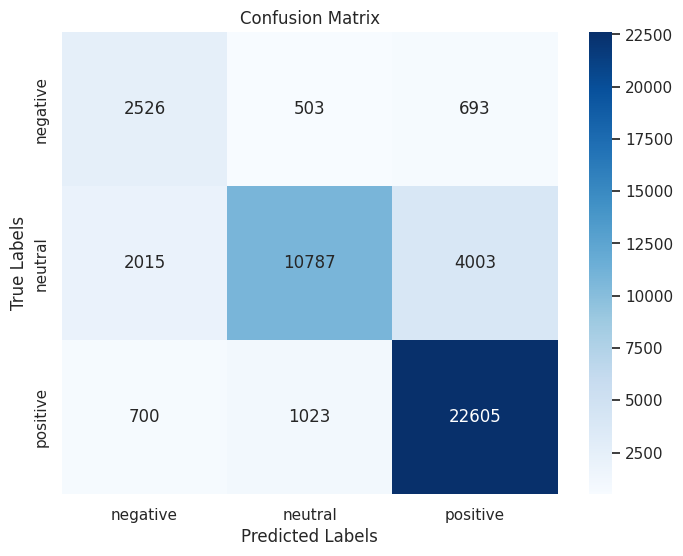

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

accuracy = accuracy_score(df['sentiment_label'], df['vader_sentiment_label'])
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(df['sentiment_label'], df['vader_sentiment_label'], average='weighted')
recall = recall_score(df['sentiment_label'], df['vader_sentiment_label'], average='weighted')
f1 = f1_score(df['sentiment_label'], df['vader_sentiment_label'], average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

print("\nClassification Report:")
print(classification_report(df['sentiment_label'], df['vader_sentiment_label']))

conf_matrix = confusion_matrix(df['sentiment_label'], df['vader_sentiment_label'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [23]:
aspect_keywords = {
    'app_performance': ["crash", "slow", "bug", "lag", "performance", "load", "response time", "freeze", "stability", "error"],
    'usability': ["interface", "easy", "difficult", "navigation", "user-friendly", "intuitive", "layout", "complicated", "design"],
    'features': ["feature", "functionality", "option", "tool", "missing", "added", "improved", "update", "customization"],
    'customer_support': ["support", "help", "service", "response", "issue", "contact", "problem", "assist", "resolution"],
    'price': ["cost", "price", "value", "affordable", "expensive", "worth", "cheap", "discount", "subscription"],
    'reliability': ["trust", "reliable", "dependable", "consistent", "available", "backup", "secure"],
    'updates': ["update", "upgrade", "maintenance", "patch", "improvement", "version"],
    'compatibility': ["compatible", "integration", "works with", "supports", "platform"],
    'user_experience': ["experience", "enjoyment", "satisfaction", "engagement"],
    'security': ["secure", "privacy", "data", "safe", "protect"],
    'notifications': ["notification", "alert", "reminder", "message"],
    'social_features': ["share", "connect", "community", "social"]
}

def assign_topic(text):
    if pd.isna(text) or not isinstance(text, str):
        return "other"

    text = text.lower()
    for topic, keywords in aspect_keywords.items():
        if any(keyword in text for keyword in keywords):
            return topic
    return "other"

df['topic'] = df['content_cleaned'].apply(assign_topic)

sentiment_by_topic = df.groupby('topic').agg({'vader_compound': 'mean'}).reset_index()
sentiment_by_topic.columns = ['topic', 'average_sentiment']

print(sentiment_by_topic)

               topic  average_sentiment
0    app_performance           0.172249
1      compatibility           0.423511
2   customer_support           0.300602
3           features           0.306677
4      notifications           0.170618
5              other           0.285107
6              price           0.349340
7        reliability           0.373527
8           security           0.263266
9    social_features           0.381826
10           updates           0.379579
11         usability           0.531819
12   user_experience           0.393299


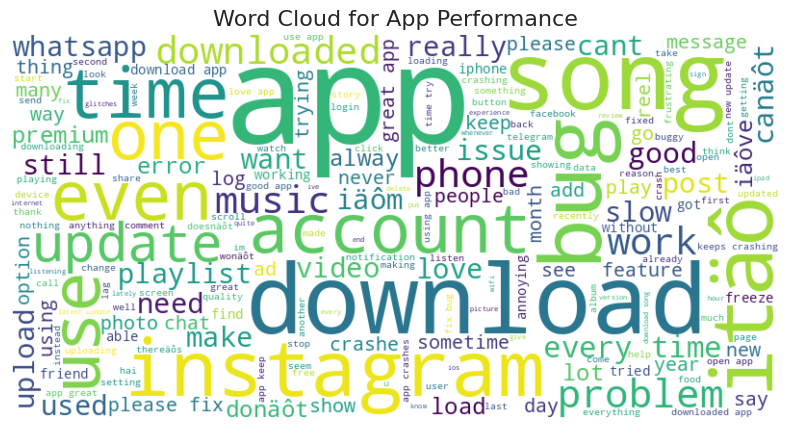

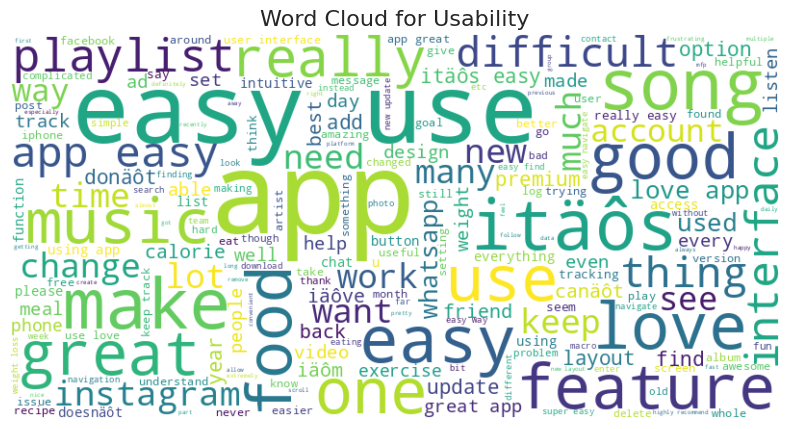

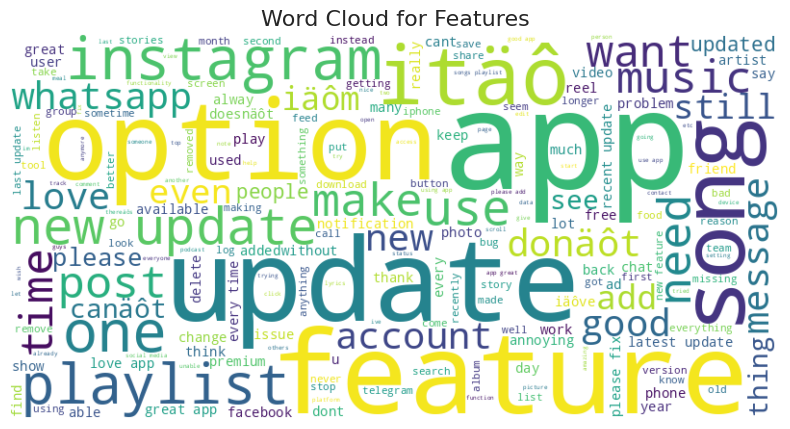

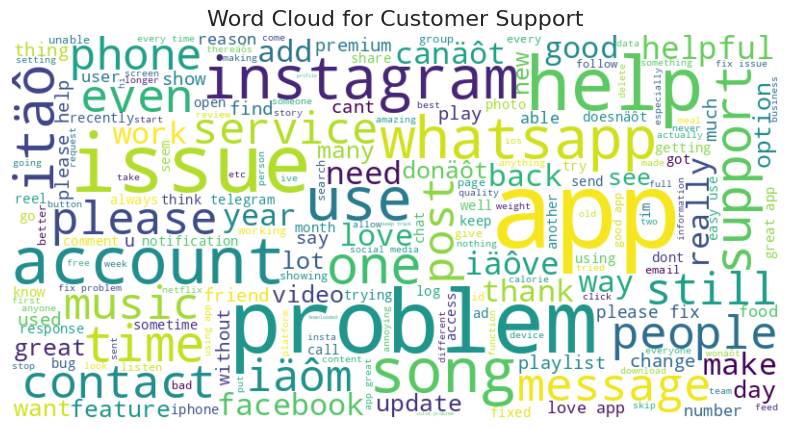

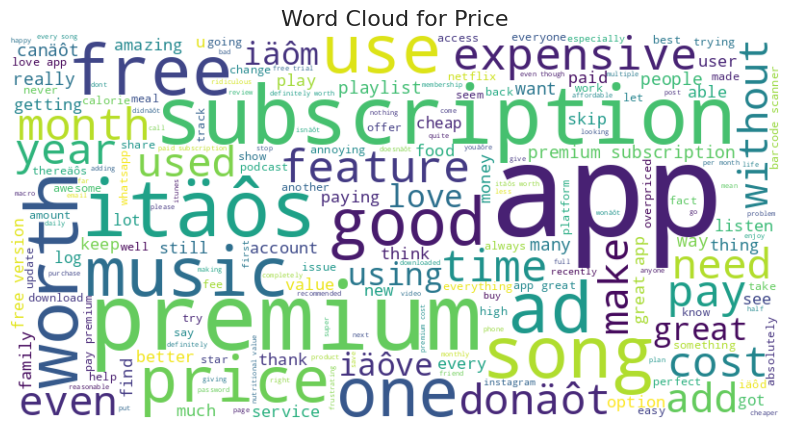

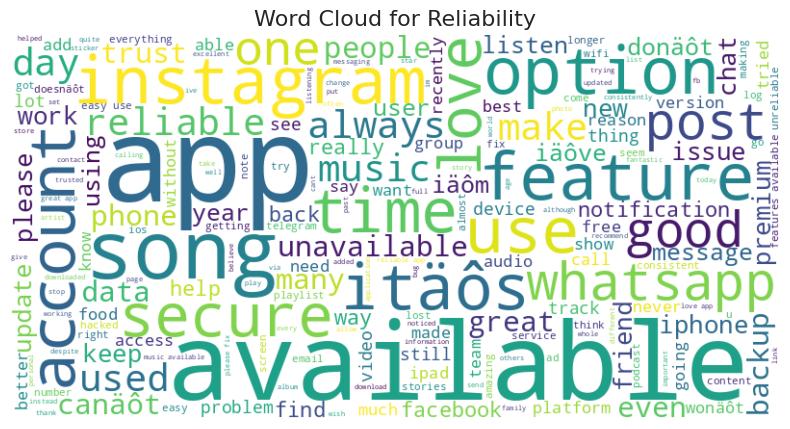

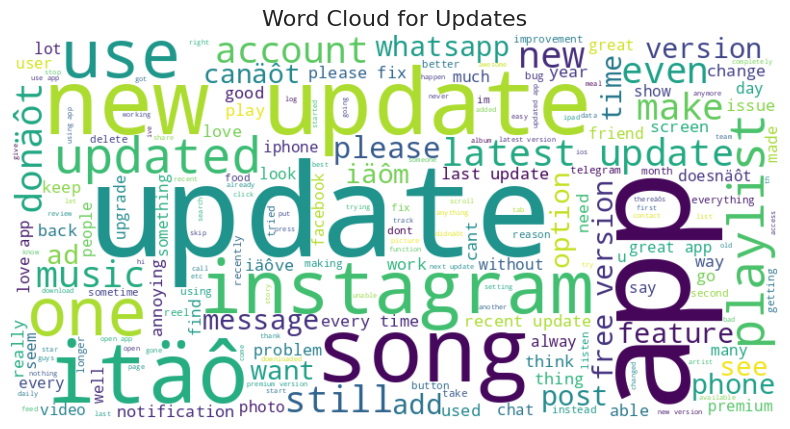

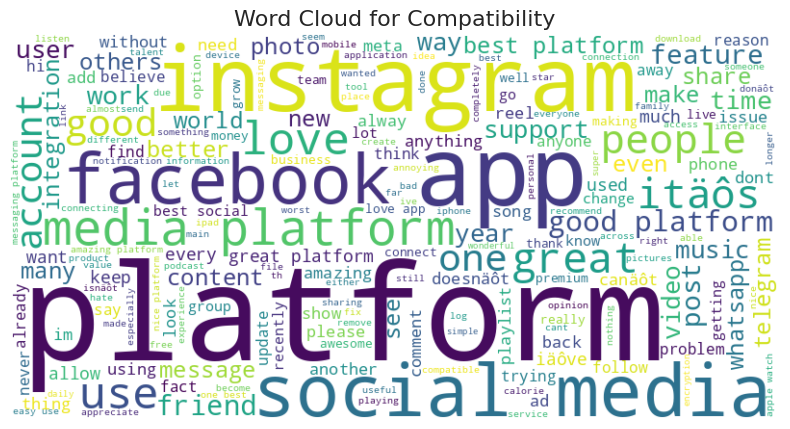

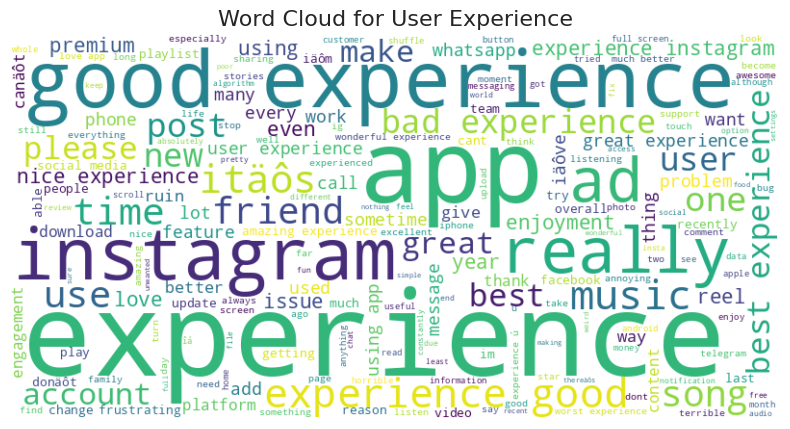

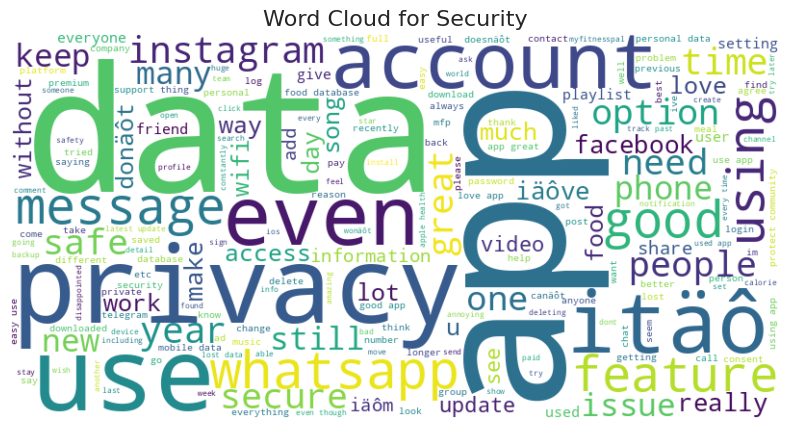

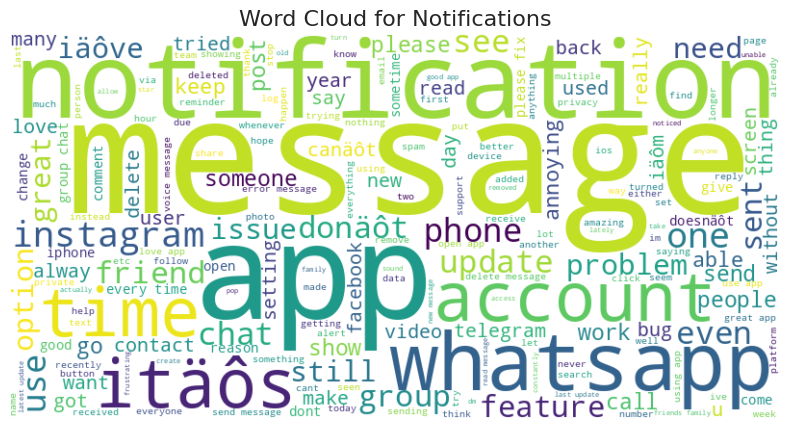

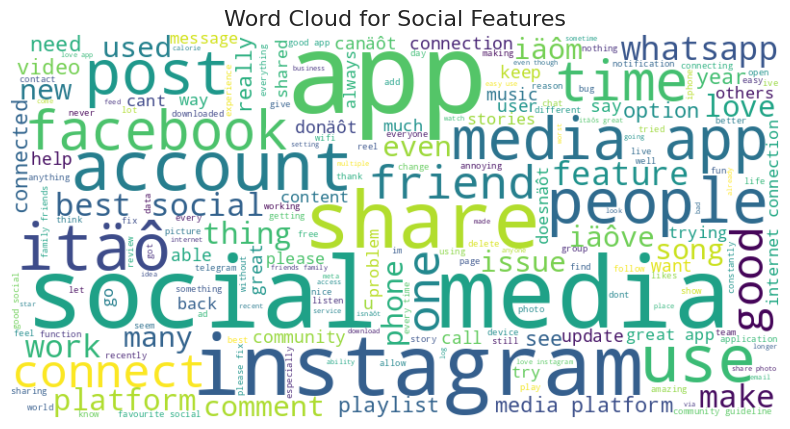

In [24]:
def create_word_cloud(topic, keywords):

    filtered_reviews = df[df['content_cleaned'].str.contains('|'.join(keywords), case=False, na=False)]

    text = ' '.join(filtered_reviews['content_cleaned'])

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {topic.replace("_", " ").title()}', fontsize=16)
    plt.axis('off')
    plt.show()

for topic, keywords in aspect_keywords.items():
    create_word_cloud(topic, keywords)

In [27]:
#!pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 7.5 MB/s eta 0:00:00


In [29]:
aspect_keywords = {
    'app_performance': ["crash", "slow", "bug", "lag", "performance"],
    'usability': ["interface", "easy", "difficult", "navigation", "user-friendly"],
    'features': ["feature", "functionality", "option", "tool", "missing"],
    'customer_support': ["support", "help", "service", "response", "issue"],
    'pricing': ["price", "cost", "expensive", "cheap", "value"],
    'updates': ["update", "upgrade", "new", "version", "release"],
    'compatibility': ["compatible", "work with", "not support", "issue", "problem"]
}

def assign_topic(text):
    if pd.isna(text) or not isinstance(text, str):
        return "other"  # Return "other" for non-string or NaN
    for topic, keywords in aspect_keywords.items():
        if any(keyword in text.lower() for keyword in keywords):
            return topic
    return "other"

df['topic'] = df['content_cleaned'].apply(assign_topic)

average_sentiment = df.groupby('topic')['vader_compound'].mean().reset_index()
average_sentiment.columns = ['topic', 'average_sentiment']

df = df.merge(average_sentiment, on='topic', how='left')

print("Columns in the DataFrame after merging:", df.columns)

def assign_sentiment_label(avg_sentiment):
    if avg_sentiment > 0.1:
        return 'positive'
    elif avg_sentiment < -0.1:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_label_by_topic'] = df['average_sentiment'].apply(assign_sentiment_label)

topic_counts = df['topic'].value_counts().reset_index()
topic_counts.columns = ['topic', 'topic_count']
df = df.merge(topic_counts, on='topic', how='left')

df.to_excel('sentiment_analysis_with_topics.xlsx', index=False)

print(df.head())

Columns in the DataFrame after merging: Index(['content_cleaned', 'review', 'rating', 'date', 'sentiment',
       'sentiment_label', 'vader_sentiment', 'vader_compound',
       'vader_sentiment_label', 'topic', 'average_sentiment_x',
       'sentiment_label_by_topic', 'topic_count', 'average_sentiment_y',
       'average_sentiment'],
      dtype='object')
                                     content_cleaned  \
0  feature one annoying aspects whatsapp everytim...   
1  privacy whatsapp incredible know probably donä...   
2  hi whatsapp app really great use everyday exac...   
3  ever equivalent social services took words awa...   
4  im holiday reliant whatsapp communicate agents...   

                                              review  rating  \
0  This feature has been one of the most annoying...       5   
1  The privacy on WhatsApp is incredible, I know ...       4   
2  Hi WhatsApp,\nThis app is really great, I use ...       4   
3  If there was ever an equivalent of social serv